## Tannis McCartney
##  May 30, 2022

## Contents:
### 01 Import libraries
### 02 Import data
### 03 Visualize price ranges in each department
### 04 Compare ordering habits and loyalty status
### 05 Compare ordering habits across regions
### 06 Compare ordering habits based on age and family status
### 07 Compare purchases by departments across the region
### 08 Compare purchases by income bracket
### 09 Customer profiling - future work

# 01 Import libraries

In [1]:
# Import libraries for analysis and visualization (separate cells is faster than a single cell)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\4 Python Fundamentals for Data Analysts\05-2022 Instacart Basket Analysis'

In [3]:
# Import the data
cust_5_plus_orders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'notebook_10_part_2.pkl'))
cust_5_plus_orders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,dependants,household_status,income,region,low_activity_customer,age_range,has_dependants,is_married,income_bracket,dept
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,South,False,30-39,True,True,< 50k,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,South,False,30-39,True,True,< 50k,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,South,False,30-39,True,True,< 50k,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,South,False,30-39,True,True,< 50k,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,South,False,30-39,True,True,< 50k,beverages


In [4]:
# Check shape of dataframe
cust_5_plus_orders.shape

(30991542, 37)

# 03 Visualize price ranges in each department

In [18]:
# Create a crosstab to compare price ranges and departments
crosstab = pd.crosstab(cust_5_plus_orders['dept'], cust_5_plus_orders['price_range'], dropna=False)
crosstab

price_range,High-range product,Low-range product,Mid-range product
dept,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,850040
beverages,0,814697,1757237
breakfast,0,209185,467888
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,0,1370908,3816043
deli,0,299220,704614


In [16]:
# Export crosstab to clipboard
crosstab.to_clipboard()

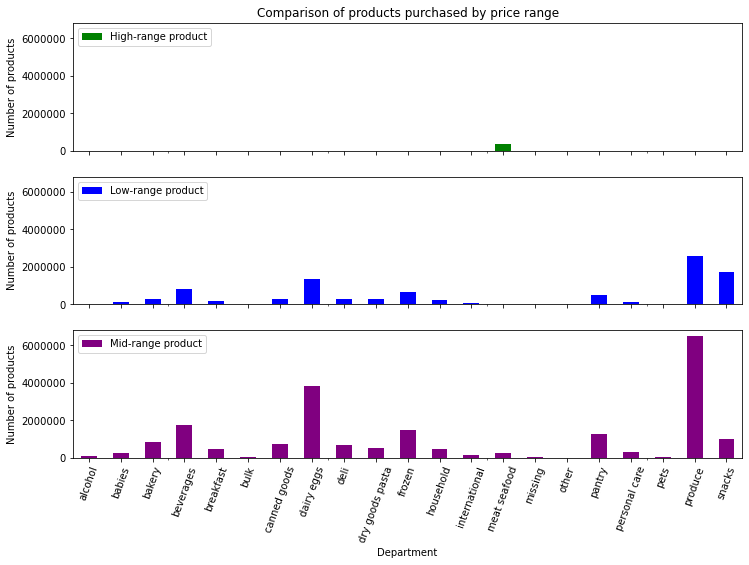

In [19]:
# Create a bar chart of the crosstab
bar = crosstab.plot.bar(
    figsize=[12,8],
    subplots=True,
    sharex=True,
    sharey=True,
    title=['Comparison of products purchased by price range', '', ''],
    color = ['green', 'blue', 'purple'],
    xlabel ='Department',
    ylabel = 'Number of products',)
bar[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar[2].tick_params(axis='x', rotation=70)
bar[0].legend(loc='upper left')
bar[1].legend(loc='upper left')

#### The high range products are in meat and seafood and pantry (too few to appear on chart). most products have mid- to low-range prices.

In [28]:
# Export bar chart
bar[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '16-bar-price_ranges.png'), bbox_inches='tight')

# 04 Compare ordering habits and loyalty status

In [22]:
# Compare ordering habits and loyalty status
crosstab2 = pd.crosstab(cust_5_plus_orders['loyalty_flag'], [cust_5_plus_orders.spending_flag, cust_5_plus_orders.order_frequency], dropna=False)
crosstab2

spending_flag         High spender                                         \
order_frequency  Frequent customer Non-frequent customer Regular customer   
loyalty_flag                                                                
Loyal Customer               14305                     0                0   
New Customer                  9941                 15589            11491   
Regular Customer             27524                  2996            17062   

spending_flag          Low spender                                         
order_frequency  Frequent customer Non-frequent customer Regular customer  
loyalty_flag                                                               
Loyal Customer            10274996                     0             4133  
New Customer               1284260               1969440          1516929  
Regular Customer           9610320                909198          5323358

In [20]:
# Export crosstab to clipboard
crosstab2.to_clipboard()

Text(0, 0, 'Number of Customers')

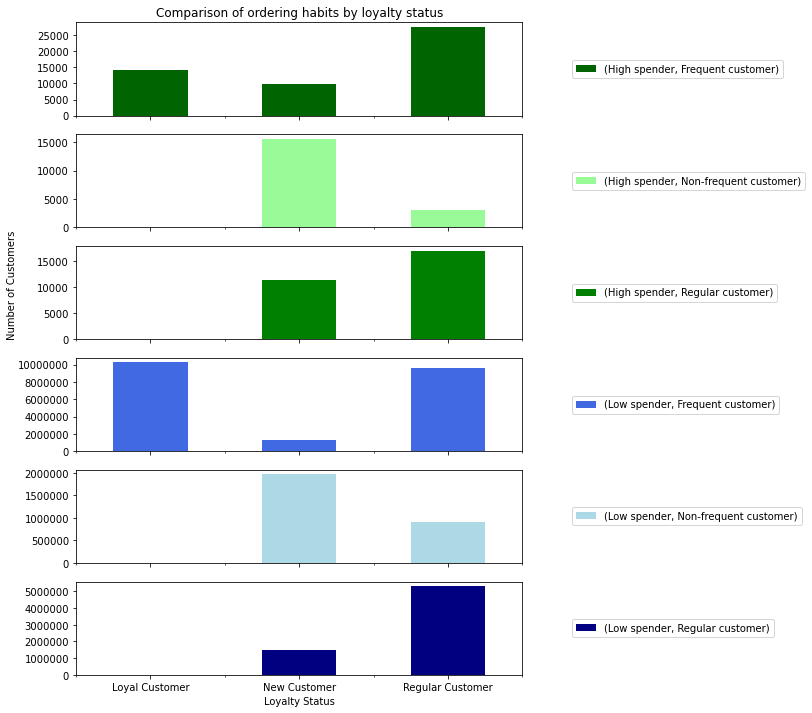

In [30]:
# Make bar chart from crosstab
bar2 = crosstab2.plot.bar(
    rot=0,
    color=['darkgreen', 'palegreen', 'green', 'royalblue', 'lightblue', 'navy'],
    figsize=[8,12],
    sharex=True,
    subplots='True',
    xlabel = "Loyalty Status",
    title = ["Comparison of ordering habits by loyalty status", '', '', '', '', ''])
bar2[0].locator_params(axis='y', nbins=6)
bar2[1].locator_params(axis='y', nbins=6)
bar2[2].locator_params(axis='y', nbins=6)
bar2[3].locator_params(axis='y', nbins=6)
bar2[4].locator_params(axis='y', nbins=6)
bar2[5].locator_params(axis='y', nbins=6)
bar2[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar2[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar2[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar2[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar2[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar2[5].ticklabel_format(useOffset=False, style='plain', axis='y')
bar2[0].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar2[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar2[2].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar2[3].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar2[4].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar2[5].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar2[2].set_ylabel('Number of Customers', labelpad=20, loc='bottom')

#### All loyal customers are frequent or regular. High-spending loyal customers are all frequent. The highest number of customers fall into the Loyal Customer, high-spending, frequent customer group.

In [52]:
# Export bar chart
bar2[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '17-bar-loyalty_order_habits.png'), bbox_inches='tight')

# 05 Compare ordering habits across regions

In [26]:
# Create a crosstab to compare region and ordering habits
crosstab3 = pd.crosstab(cust_5_plus_orders['region'], [cust_5_plus_orders.spending_flag, cust_5_plus_orders.order_frequency], dropna=False)
crosstab3

spending_flag        High spender                                         \
order_frequency Frequent customer Non-frequent customer Regular customer   
region                                                                     
Midwest                     13019                  4897             6350   
Northeast                    7296                  2723             5144   
Pacific                      4577                  1984             3014   
South                       16317                  5563             8619   
West                         9052                  2898             4017   

spending_flag         Low spender                                         
order_frequency Frequent customer Non-frequent customer Regular customer  
region                                                                    
Midwest                   4926194                685693          1631304  
Northeast                 3736663                494664          1223384  
Pacific                   2112414                286482           664234  
South                     6257924                850448          1983644  
West                      3332942                449214          1063313

In [24]:
# Export crosstab to clipboard
crosstab3.to_clipboard()

Text(0, 0, 'Number of Customers')

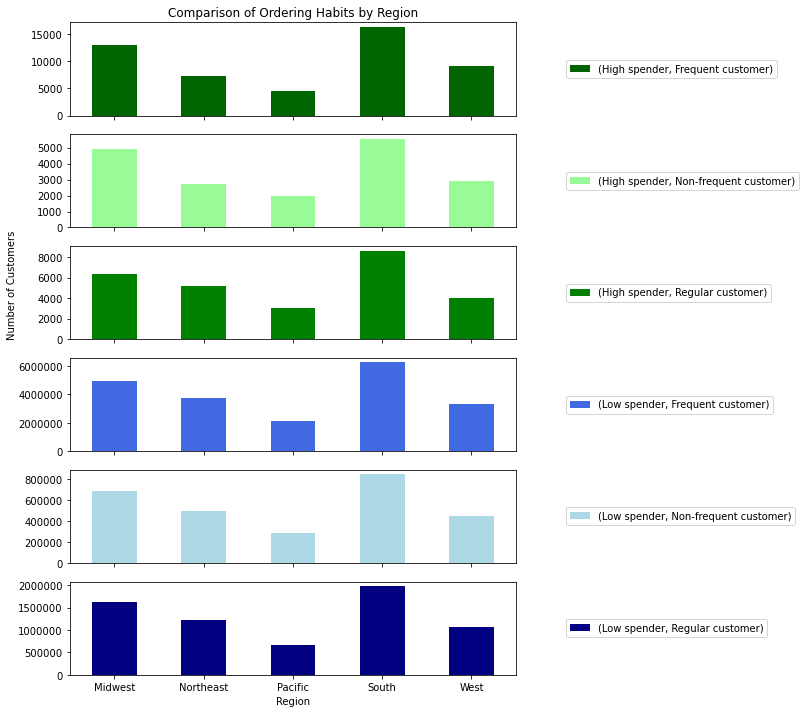

In [27]:
# Make bar chart from crosstab
bar3 = crosstab3.plot.bar(
    figsize=[8,12],
    rot = 0,
    color = ['darkgreen', 'palegreen', 'green', 'royalblue', 'lightblue', 'navy'],
    subplots = 'True',
    sharex = True,
    xlabel = 'Region',
    title = ['Comparison of Ordering Habits by Region', '', '', '', '', ''])
bar3[0].locator_params(axis='y', nbins=6)
bar3[1].locator_params(axis='y', nbins=6)
bar3[2].locator_params(axis='y', nbins=6)
bar3[3].locator_params(axis='y', nbins=6)
bar3[4].locator_params(axis='y', nbins=6)
bar3[5].locator_params(axis='y', nbins=6)
bar3[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar3[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar3[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar3[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar3[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar3[5].ticklabel_format(useOffset=False, style='plain', axis='y')
bar3[0].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar3[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar3[2].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar3[3].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar3[4].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar3[5].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar3[2].set_ylabel('Number of Customers', labelpad=20, loc='bottom')

#### The largest number of customers overall is in the South, followed by the Midwest, Northeast, West, and Pacific. There are no apparent regional trends among ordering habits (spending flag and loyalty flag) - in all regions there are more low spenders than high spenders.

In [50]:
# Export bar chart
bar3[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '18-bar-regions_order_habits.png'), bbox_inches='tight')

# 06 Compare ordering habits based on age and family status

In [28]:
# Create a crosstab to compare age and ordering habits
crosstab4 = pd.crosstab(cust_5_plus_orders['age_range'], [cust_5_plus_orders.spending_flag, cust_5_plus_orders.order_frequency], dropna=False)
crosstab4

spending_flag        High spender                                         \
order_frequency Frequent customer Non-frequent customer Regular customer   
age_range                                                                  
0-20                         2258                   497              654   
20-29                        6089                  2968             3932   
30-39                        7650                  3249             4521   
40-49                        9024                  3216             5091   
50-59                        8016                  2882             4899   
60-69                       10013                  2350             3907   
70-79                        6848                  2954             4374   
80 plus                      1872                   469             1175   

spending_flag         Low spender                                         
order_frequency Frequent customer Non-frequent customer Regular customer  
age_range                                                                 
0-20                       667606                 91871           212546  
20-29                     3321587                444933          1067832  
30-39                     3299779                444534          1091764  
40-49                     3344433                460494          1065133  
50-59                     3296752                451952          1081783  
60-69                     3257724                449804          1042223  
70-79                     3313271                443916          1066838  
80 plus                    668424                 91134           216301

In [29]:
# Export crosstab to clipboard
crosstab4.to_clipboard()

Text(0, 0, 'Number of Customers')

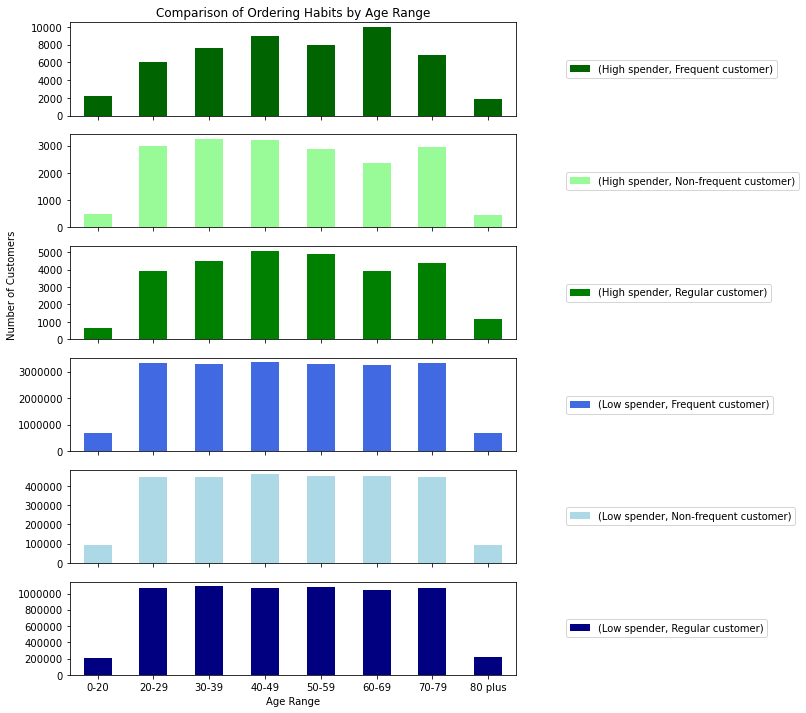

In [33]:
# Make bar chart from crosstab
bar4 = crosstab4.plot.bar(
    figsize=[8,12],
    rot = 0,
    color = ['darkgreen', 'palegreen', 'green', 'royalblue', 'lightblue', 'navy'],
    subplots = 'True',
    sharex = True,
    xlabel = 'Age Range',
    title = ['Comparison of Ordering Habits by Age Range', '', '', '', '', ''])
bar4[0].locator_params(axis='y', nbins=6)
bar4[1].locator_params(axis='y', nbins=6)
bar4[2].locator_params(axis='y', nbins=6)
bar4[3].locator_params(axis='y', nbins=6)
bar4[4].locator_params(axis='y', nbins=6)
bar4[5].locator_params(axis='y', nbins=6)
bar4[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar4[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar4[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar4[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar4[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar4[5].ticklabel_format(useOffset=False, style='plain', axis='y')
bar4[0].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar4[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar4[2].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar4[3].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar4[4].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar4[5].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar4[2].set_ylabel('Number of Customers', labelpad=20, loc='bottom')

#### Customers aged 60-69 are the highest spending, most frequent customers while customers aged 40-49 are the highest spending regular customers. Customers aged 0-20 and 80+ are the smallest groups, and are consistently the lowest spenders and least frequent customers.

In [34]:
# Export bar chart
bar4[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '19-bar-ages_order_habits.png'), bbox_inches='tight')

In [35]:
# Create a crosstab to compare ordering habits by family status
crosstab5 = pd.crosstab(cust_5_plus_orders['household_status'], [cust_5_plus_orders.spending_flag, cust_5_plus_orders.order_frequency], dropna=False)
crosstab5

spending_flag                         High spender                        \
order_frequency                  Frequent customer Non-frequent customer   
household_status                                                           
divorced/widowed                              4665                  1298   
living with parents and siblings              2725                   740   
married                                      33326                 13248   
single                                       11054                  3299   

spending_flag                                           Low spender  \
order_frequency                  Regular customer Frequent customer   
household_status                                                      
divorced/widowed                             2591           1815561   
living with parents and siblings             1242           1028771   
married                                     19528          14867114   
single                                       5192           3458130   

spending_flag                                                            
order_frequency                  Non-frequent customer Regular customer  
household_status                                                         
divorced/widowed                                242938           580608  
living with parents and siblings                138096           311001  
married                                        2027518          4801536  
single                                          470086          1151275

In [36]:
# Export crosstab to clipboard
crosstab5.to_clipboard()

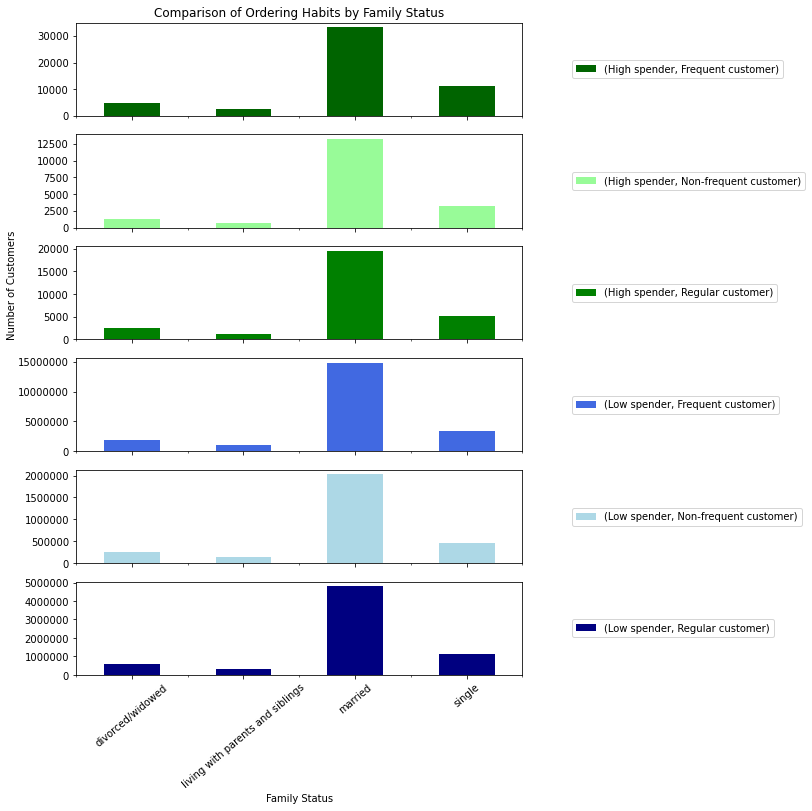

In [40]:
# Make bar chart from crosstab
bar5 = crosstab5.plot.bar(
    figsize=[8,12],
    rot = 0,
    color = ['darkgreen', 'palegreen', 'green', 'royalblue', 'lightblue', 'navy'],
    subplots = 'True',
    sharex = True,
    xlabel = 'Family Status',
    title = ['Comparison of Ordering Habits by Family Status', '', '', '', '', ''])
bar5[0].locator_params(axis='y', nbins=6)
bar5[1].locator_params(axis='y', nbins=6)
bar5[2].locator_params(axis='y', nbins=6)
bar5[3].locator_params(axis='y', nbins=6)
bar5[4].locator_params(axis='y', nbins=6)
bar5[5].locator_params(axis='y', nbins=6)
bar5[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar5[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar5[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar5[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar5[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar5[5].ticklabel_format(useOffset=False, style='plain', axis='y')
bar5[0].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar5[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar5[2].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar5[3].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar5[4].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar5[5].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar5[2].set_ylabel('Number of Customers', labelpad=20, loc='bottom')
bar5[5].tick_params(axis = 'x', rotation = 40)

#### Married customers make up the largest group of customers with all types of ordering habits. Customers living with parents and siblings are the smallest group.

In [41]:
# Export bar chart
bar5[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '20-bar-family_status_order_habits.png'), bbox_inches='tight')

In [42]:
# Create crosstab to compare ordering habits with number of dependants
crosstab6 = pd.crosstab(cust_5_plus_orders['dependants'], [cust_5_plus_orders.spending_flag, cust_5_plus_orders.order_frequency], dropna=False)
crosstab6

spending_flag        High spender                                         \
order_frequency Frequent customer Non-frequent customer Regular customer   
dependants                                                                 
0                           15719                  4597             7783   
1                           10416                  4482             6660   
2                           11678                  5480             6611   
3                           13957                  4026             7499   

spending_flag         Low spender                                         
order_frequency Frequent customer Non-frequent customer Regular customer  
dependants                                                                
0                         5273691                713024          1731883  
1                         5292001                732859          1679275  
2                         5296272                712656          1707263  
3                         5307612                720099          1725999

In [43]:
# Export crosstab to clipboard
crosstab6.to_clipboard()

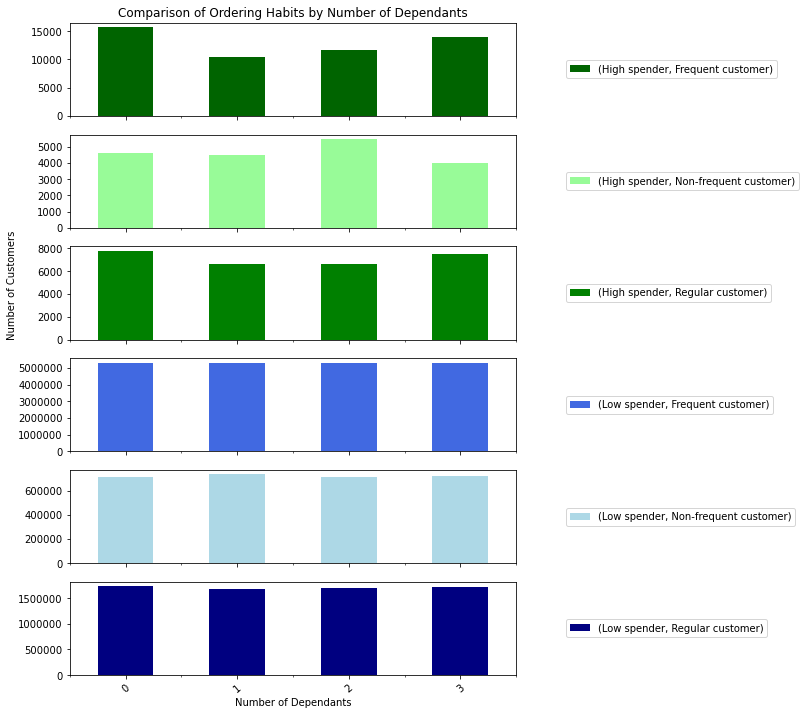

In [45]:
# Make bar chart from crosstab
bar6 = crosstab6.plot.bar(
    figsize=[8,12],
    rot = 0,
    color = ['darkgreen', 'palegreen', 'green', 'royalblue', 'lightblue', 'navy'],
    subplots = 'True',
    sharex = True,
    xlabel = 'Number of Dependants',
    title = ['Comparison of Ordering Habits by Number of Dependants', '', '', '', '', ''])
bar6[0].locator_params(axis='y', nbins=6)
bar6[1].locator_params(axis='y', nbins=6)
bar6[2].locator_params(axis='y', nbins=6)
bar6[3].locator_params(axis='y', nbins=6)
bar6[4].locator_params(axis='y', nbins=6)
bar6[5].locator_params(axis='y', nbins=6)
bar6[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar6[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar6[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar6[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar6[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar6[5].ticklabel_format(useOffset=False, style='plain', axis='y')
bar6[0].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar6[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar6[2].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar6[3].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar6[4].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar6[5].legend(loc='center left', bbox_to_anchor=(1.1,0.5))
bar6[2].set_ylabel('Number of Customers', labelpad=20, loc='bottom')
bar6[5].tick_params(axis = 'x', rotation = 40)

#### Customers with zero dependants are more likely to be high-spending, frequent customers than those with dependants. This is the only obvious relationship between number of dependants and ordering habits - for the most parts the distributions appear similar.

In [46]:
# Export bar chart
bar6[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '21-bar-dependants_order_habits.png'), bbox_inches='tight')

# 07 Compare purchases by department across the regions

In [71]:
# Compare department and region
crosstab7 = pd.crosstab(cust_5_plus_orders['dept'], [cust_5_plus_orders.region], dropna=False)
crosstab7

region,Midwest,Northeast,Pacific,South,West
dept,,,,,
alcohol,34043,25017,13550,43801,23204
babies,95741,72712,40830,123522,61598
bakery,262614,200136,112345,329785,176876
beverages,598990,462931,249184,759483,401394
breakfast,157553,119157,66978,199441,108208
bulk,7929,5599,3438,9850,5305
canned goods,237459,176936,99260,298484,160961
dairy eggs,1215821,917293,516155,1528960,814736
deli,234464,178398,100068,294353,157284


In [48]:
# Export crosstab to clipboard
crosstab7.to_clipboard()

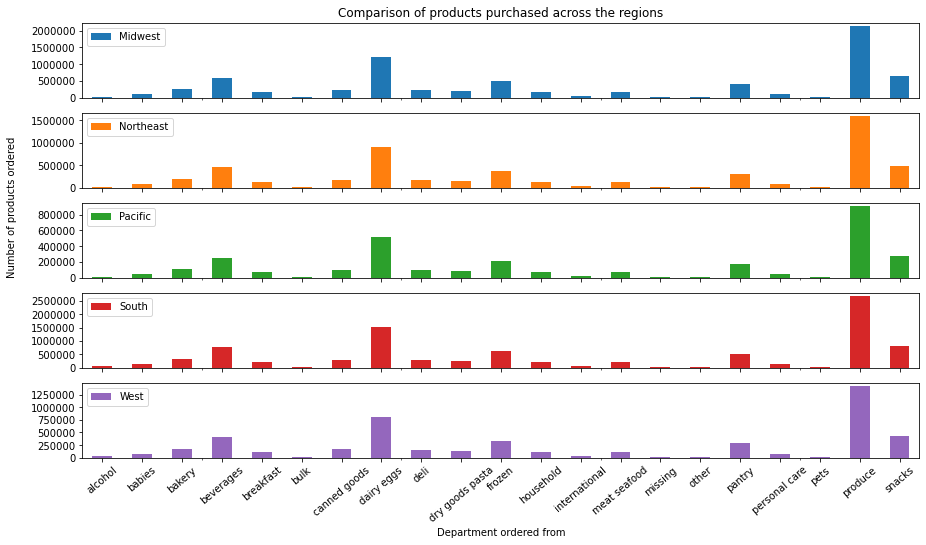

In [117]:
# Plot sales by department and region
bar7 = crosstab7.plot.bar(
    figsize = [15, 8],
    subplots = 'True',
    sharex = True,
    ylabel = 'Number of Products Ordered',
    title = ['Comparison of products purchased across the regions', '', '', '', ''])
bar7[4].set_xlabel('Department ordered from')
bar7[0].set_ylabel('', labelpad=20, loc='bottom')
bar7[1].set_ylabel('', labelpad=20, loc='bottom')
bar7[2].set_ylabel('Number of products ordered', labelpad=20, loc='bottom')
bar7[3].set_ylabel('', labelpad=20, loc='bottom')
bar7[4].set_ylabel('', labelpad=20, loc='bottom')
bar7[0].locator_params(axis='y', nbins=6)
bar7[1].locator_params(axis='y', nbins=6)
bar7[2].locator_params(axis='y', nbins=6)
bar7[3].locator_params(axis='y', nbins=6)
bar7[4].locator_params(axis='y', nbins=6)
bar7[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar7[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar7[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar7[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar7[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar7[4].tick_params(axis = 'x', rotation = 40)

#### This analysis would be enhanced by the normalization of the data, showing percentages rather than total orders.

In [118]:
# Export bar chart
bar7[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '22-bar-region_departments.png'), bbox_inches='tight')

# 08 Compare purchases by income bracket

In [107]:
# Compare department and region
crosstab8 = pd.crosstab(cust_5_plus_orders['dept'], [cust_5_plus_orders.income_bracket], dropna=False)
crosstab8

income_bracket,100-200k,200-500k,50-100k,< 50k,> 500k
dept,,,,,
alcohol,63015,5519,57438,18047,608
babies,194600,1827,184448,29240,277
bakery,516444,11830,487767,108186,799
beverages,1101816,22938,1062334,383123,1723
breakfast,293668,6163,284634,92191,417
bulk,14191,24,14557,4676,3
canned goods,476164,8320,447846,78975,769
dairy eggs,2368473,40933,2275596,503429,3397
deli,454791,6908,435287,106448,400


In [83]:
# Copy crosstab to clipboard
crosstab8.to_clipboard()

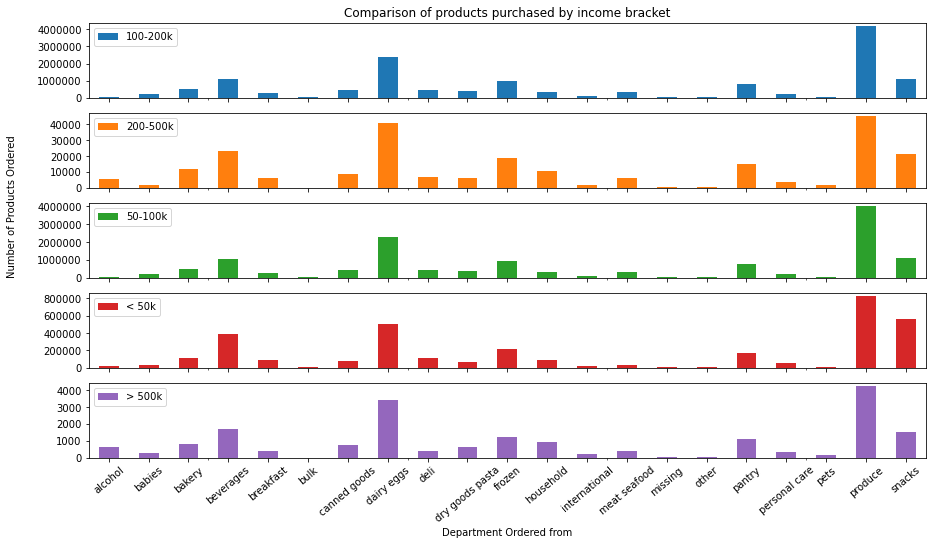

In [120]:
# Plot sales by department and income bracket
bar8 = crosstab8.plot.bar(
    figsize = [15, 8],
    subplots = 'True',
    sharex = True,
    ylabel = 'Number of Products Ordered',
    title = ['Comparison of products purchased by income bracket', '', '', '', ''])
bar8[4].set_xlabel('Department Ordered from')
bar8[0].set_ylabel('', labelpad=20, loc='bottom')
bar8[1].set_ylabel('', labelpad=20, loc='bottom')
bar8[2].set_ylabel('Number of Products Ordered', labelpad=20, loc='bottom')
bar8[3].set_ylabel('', labelpad=20, loc='bottom')
bar8[4].set_ylabel('', labelpad=20, loc='bottom')
bar8[0].locator_params(axis='y', nbins=6)
bar8[1].locator_params(axis='y', nbins=6)
bar8[2].locator_params(axis='y', nbins=6)
bar8[3].locator_params(axis='y', nbins=6)
bar8[4].locator_params(axis='y', nbins=6)
bar8[0].ticklabel_format(useOffset=False, style='plain', axis='y')
bar8[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar8[2].ticklabel_format(useOffset=False, style='plain', axis='y')
bar8[3].ticklabel_format(useOffset=False, style='plain', axis='y')
bar8[4].ticklabel_format(useOffset=False, style='plain', axis='y')
bar8[4].tick_params(axis = 'x', rotation = 40)

In [121]:
# Export bar chart
bar8[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '23-bar-income_departments.png'), bbox_inches='tight')

# 09 Customer profiling - future work

### Profiles based on marital status and dependants

In [79]:
# Create a cross-tab to compare is_married and has_dependants
crosstab9 = pd.crosstab(cust_5_plus_orders['has_dependants'], cust_5_plus_orders['is_married'], dropna=False)
crosstab9

is_married,False,True
has_dependants,,
False,5099036,0
True,1482575,21762270


#### By combining the is_married and has_dependants flag, three customer profiles emerge: Single parent, Single with no children, Married with Children. A fourth could be added based on the household_status of 'living with parents and/or siblings.' 

#### The department, 'babies,' could be used to see which parents have young children.

#### Further analysis of ordering/spending habits of these profiles is left for future work.

In [80]:
# Export crosstab
crosstab9.to_clipboard()